# Approximate PDF for the invariant mass distribution of combinatorial background

We derive an approximate pdf for the invariant mass distribution from combinatorial background. Combinatorial background refers to random pairs of unrelated particles that are combined to compute the invariant mass of the hypothetical ancestor particle.

It is known empirically that an exponential distribution often provides a good description of this background. We show here why that is. We work in coordinates where $c=1$.

We express the 3-momentum of a particle in $p_T, \eta, \phi$ since the probability distributions approximately factorize:

$$
g(p_T) \, h_1(\phi) \, h_2(\eta)
$$

where $h_1(\phi)$ is a uniform distribution from $-\pi, \pi$ and $h_2(\eta)$ is a somewhat bell-shaped pdf around 0 with a broadened center and with a dip at zero. We will see that the result does not depend on $h_2(\eta)$ within the limits of the approximation.

The distribution $g(p_T)$ is approximately exponential for $p_T \gg 1\,\text{GeV}c^{-1}$. We will assume it is exponential, which is the first approximation.

We now express the invariant mass $m$ of the hypothetical ancestor particle in these coordinates.

In [1]:
from sympy import *

In [2]:
def ancestor_mass(pt1, eta1, phi1, pt2, eta2, phi2, m1, m2):
    # see e.g. Wikipedia https://en.wikipedia.org/wiki/Pseudorapidity
    
    px1 = cos(phi1) * pt1
    py1 = sin(phi1) * pt1
    pz1 = sinh(eta1) * pt1

    px2 = cos(phi2) * pt2
    py2 = sin(phi2) * pt2
    pz2 = sinh(eta2) * pt2

    # momentum squared of ancestor
    p_sq = (px1 + px2) ** 2 + (py1 + py2) ** 2 + (pz1 + pz2) ** 2
    
    # momentum squared of particles 1 and 2
    p1_sq = px1 ** 2 + py1 ** 2 + pz1 ** 2
    p2_sq = px2 ** 2 + py2 ** 2 + pz2 ** 2
    
    # energies of particles 1 and 2
    e1 = sqrt(p1_sq + m1 ** 2)
    e2 = sqrt(p2_sq + m2 ** 2)

    return sqrt((e1 + e2) ** 2 - p_sq)

We use SymPy to transform and simplify the formula for the ancestor mass. First we declare the variables.

In [3]:
pt1, pt2, m1, m2, lambd, m = symbols("p_T_1 p_T_2 m_1 m_2 lambda m", positive=True, real=True)

eta1, eta2, phi1, phi2 = symbols("eta_1 eta_2 phi_1 phi_2", real=True)

In [4]:
ancestor_mass(pt1, eta1, phi1, pt2, eta2, phi2, m1, m2)

sqrt(-(p_T_1*sin(phi_1) + p_T_2*sin(phi_2))**2 - (p_T_1*cos(phi_1) + p_T_2*cos(phi_2))**2 - (p_T_1*sinh(eta_1) + p_T_2*sinh(eta_2))**2 + (sqrt(m_1**2 + p_T_1**2*sin(phi_1)**2 + p_T_1**2*cos(phi_1)**2 + p_T_1**2*sinh(eta_1)**2) + sqrt(m_2**2 + p_T_2**2*sin(phi_2)**2 + p_T_2**2*cos(phi_2)**2 + p_T_2**2*sinh(eta_2)**2))**2)

The raw expression for the ancestor mass is rather complex. We ask SymPy to simplify it.

In [5]:
m_expr = ancestor_mass(pt1, eta1, phi1, pt2, eta2, phi2, m1, m2).simplify(); m_expr

sqrt(m_1**2 + m_2**2 - 2*p_T_1*p_T_2*cos(phi_1 - phi_2) - 2*p_T_1*p_T_2*sinh(eta_1)*sinh(eta_2) + 2*sqrt(m_1**2 + p_T_1**2*cosh(eta_1)**2)*sqrt(m_2**2 + p_T_2**2*cosh(eta_2)**2))

This looks much better.

We now introduce the second approximation. We assume that $m_i \ll p_{T,i}$, which plays along nicely with the first approximation $p_{T,i} \gg 1\,\text{GeV}c^{-1}$ if the outgoing particles are light. In other words, this approximation can be expected to work well for decays into particles with masses $m_i \ll 1\,\text{GeV}c^{-2}$.

We expand the expression to first order in $m_{i}$ in a Taylor series. The first order happens to be zero, so we simply get:

In [6]:
m_approx_expr = m_expr.subs(m1, 0).subs(m2, 0).simplify(); Eq(m, m_approx_expr)

Eq(m, sqrt(2)*sqrt(p_T_1)*sqrt(p_T_2)*sqrt(-cos(phi_1 - phi_2) + cosh(eta_1 - eta_2)))

To compute the pdf of the ancestor mass $m$, we need to perform a change of variable and then integrate over the remaining coordinates.

We first make the change of variables. 

The old variables are $p_{T,1}, p_{T,2}, \eta_1, \eta_2, \phi_1, \phi_2$.

The new variables are $m, p_{T,2}, \eta_1, \eta_2, \phi_1, \phi_2$.

The pdf in the new variables is

$$
f'(m, p_{T,2}, \eta_1, \eta_2, \phi_1, \phi_2) = g(p_{T,1}) \, g(p_{T,2}) \, h_1(\phi_1) \, h_1(\phi_2) \, h_2(\eta_1) \, h_2(\eta_2) \,
\left|\frac{\partial(m, p_{T,2}, \eta_1, \eta_2, \phi_1, \phi_2)}{\partial(p_{T,1}, p_{T,2}, \eta_1, \eta_2, \phi_1, \phi_2)} \right|^{-1} \\
f'(m, p_{T,2}, \eta_1, \eta_2, \phi_1, \phi_2) = g(p_{T,1}(m, p_{T,2}, \dots)) \, g(p_{T,2}) \, h_1(\phi_1) \, h_1(\phi_2) \, h_2(\eta_1) \, h_2(\eta_2) \, \left| \frac{\partial m}{\partial p_{T, 1}} \right|^{-1}
$$

We manually express $\sqrt{p_{T, 1}}$ as a function of $m$, to replace it later. The SymPy solver has trouble doing this, as it tends to break down the $\cosh$ into exponentials, but we want to keep it intact.

In [7]:
sqrt_pt1 = m / m_approx_expr * sqrt(pt1); Eq(sqrt(pt1), sqrt_pt1)

Eq(sqrt(p_T_1), sqrt(2)*m/(2*sqrt(p_T_2)*sqrt(-cos(phi_1 - phi_2) + cosh(eta_1 - eta_2))))

In [8]:
pt1_m = sqrt_pt1 ** 2; Eq(pt1, pt1_m)

Eq(p_T_1, m**2/(2*p_T_2*(-cos(phi_1 - phi_2) + cosh(eta_1 - eta_2))))

We compute $\left| \frac{\partial m}{\partial p_{T, 1}} \right|^{-1}$ and express it as a function of $m$.

In [9]:
dpt1_dm = 1/diff(m_approx_expr, pt1); dpt1_dm

sqrt(2)*sqrt(p_T_1)/(sqrt(p_T_2)*sqrt(-cos(phi_1 - phi_2) + cosh(eta_1 - eta_2)))

In [10]:
dpt1_dm = dpt1_dm.subs(sqrt(pt1), sqrt_pt1); dpt1_dm

m/(p_T_2*(-cos(phi_1 - phi_2) + cosh(eta_1 - eta_2)))

In [11]:
# exponential pdf
def g(pt):
    return lambd * exp(-lambd * pt)

In [12]:
# uniform pdf from -pi, pi
def h1(phi):
    return 1/(2 * pi)

In [13]:
# unspecified pdf for eta
h2 = Function("h2")

In [14]:
f_prime = simplify(dpt1_dm * g(pt1_m) * g(pt2) * h1(phi1) * h1(phi2) * h2(eta1) * h2(eta2)); f_prime

-lambda**2*m*h2(eta_1)*h2(eta_2)*exp(lambda*(m**2/(2*p_T_2*(cos(phi_1 - phi_2) - cosh(eta_1 - eta_2))) - p_T_2))/(4*pi**2*p_T_2*(cos(phi_1 - phi_2) - cosh(eta_1 - eta_2)))

To obtain $f(m)$, we need to integrate $f'$ over $p_{T,2}, \phi_1, \phi_2, \eta_1, \eta_2$.

In [15]:
Integral(f_prime, 
         (pt2, 0, oo),
         (eta1, "eta_a", "eta_b"), (eta2, "eta_a", "eta_b"),
         (phi1, -pi, pi), (phi2, -pi, pi))

Integral(-lambda**2*m*h2(eta_1)*h2(eta_2)*exp(lambda*(m**2/(2*p_T_2*(cos(phi_1 - phi_2) - cosh(eta_1 - eta_2))) - p_T_2))/(4*pi**2*p_T_2*(cos(phi_1 - phi_2) - cosh(eta_1 - eta_2))), (p_T_2, 0, oo), (eta_1, eta_a, eta_b), (eta_2, eta_a, eta_b), (phi_1, -pi, pi), (phi_2, -pi, pi))

This integral does not look analytically tractable. Since it contains an exponential function, Laplace's method comes to mind as an approximation. To apply it, the function $g(\vec x)$ in the exponential $e^{M g(\vec x)}$ must have a global maximum inside the integration bounds. We investigate $g(\vec x)$ numerically to see whether that is the case.

In [16]:
def g(x, y, z):
    return 1/(x * (np.cos(z) - np.cosh(y) + 1e-100)) - x

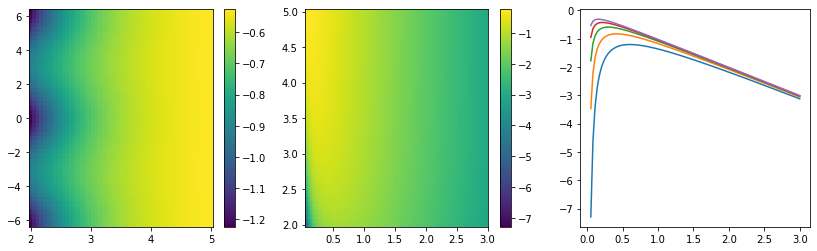

In [17]:
import numpy as np
import matplotlib.pyplot as plt

xn = np.linspace(0.05, 3, 100)
yn = np.linspace(2, 5)
zn = np.linspace(-2*np.pi, 2* np.pi)

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
plt.sca(ax[0])
Y, Z = np.meshgrid(yn, zn)
plt.pcolormesh(Y, Z, g(0.5, Y, Z), shading="nearest")
plt.colorbar()
plt.sca(ax[1])
X, Y = np.meshgrid(xn, yn)
plt.pcolormesh(X, Y, g(X, Y, 0), shading="nearest")
plt.colorbar()
plt.sca(ax[2])
for yi in yn[::10]:
    plt.plot(xn, g(xn, yi, 0))

There is indeed a global maximum as a function of $p_{T,2}$ between 0 and infinity, but not with respect to $\Delta\eta$. The maximum for $\Delta\eta$ is located at the upper bound of the $\eta$ interval, which means that Laplace's method cannot be applied to the integral as a whole.

We cannot solve the integral completely, so we do the next-best thing. We partially solve it by approximately carrying out the integration over $p_{T,2}$ for each value of $C(\Delta\eta, \Delta\phi) = \cosh\Delta\eta - \cos\Delta\phi$ with Laplace's method:

$$
\int h(x) e^{M g(x)} \text{d}x \approx \sqrt{\frac{2\pi}{M |g''(x_0)|}} h(x_0) e^{M g(x_0)} 
$$

with $M > 0, M \rightarrow \infty, h(x) > 0$ and $x_0$ being the maximum of $g(x)$.

To obtain simpler formulas, we make a bunch of substitutions:

* $x := p_{T,2}$
* $\Delta \eta := \eta_1 - \eta_2$
* $\Delta \phi := \phi_1 - \phi_2$
* $C(\Delta\eta, \Delta\phi) := \cosh \Delta\eta - \cos\Delta\phi$

In [18]:
deta, dphi = symbols(r"\Delta\eta \Delta\phi")

x = symbols("x", real=True, positive=True)
C = Function("C", real=True, positive=True)(deta, dphi)

f_prime = f_prime.subs((cosh(eta1 - eta2)-cos(phi1 - phi2)), C).subs(eta1, eta2 + deta).subs(phi1, phi2 + dphi).subs(pt2, x).simplify(); f_prime

lambda**2*m*h2(eta_2)*h2(\Delta\eta + eta_2)*exp(-lambda*(m**2/(2*x*C(\Delta\eta, \Delta\phi)) + x))/(4*pi**2*x*C(\Delta\eta, \Delta\phi))

In [19]:
M = lambd

In [20]:
g = -m ** 2 / (2 * x * C) - x; g

-m**2/(2*x*C(\Delta\eta, \Delta\phi)) - x

In [21]:
h = f_prime / exp(M * g).simplify(); h

lambda**2*m*h2(eta_2)*h2(\Delta\eta + eta_2)/(4*pi**2*x*C(\Delta\eta, \Delta\phi))

In [22]:
assert simplify(h * exp(M * g)) == f_prime

In [23]:
gx = diff(g, x); gx

m**2/(2*x**2*C(\Delta\eta, \Delta\phi)) - 1

In [24]:
gxx = diff(g, x, 2); gxx

-m**2/(x**3*C(\Delta\eta, \Delta\phi))

In [25]:
x0 = solve(Eq(gx, 0), x)[0]; x0 # there is only one solution, since x > 0

sqrt(2)*m/(2*sqrt(C(\Delta\eta, \Delta\phi)))

In [26]:
gxx0 = gxx.subs(x, x0); gxx0

-2*sqrt(2)*sqrt(C(\Delta\eta, \Delta\phi))/m

In [27]:
h0 = h.subs(x, x0); h0

sqrt(2)*lambda**2*h2(eta_2)*h2(\Delta\eta + eta_2)/(4*pi**2*sqrt(C(\Delta\eta, \Delta\phi)))

In [28]:
g0 = g.subs(x, x0); g0

-sqrt(2)*m/sqrt(C(\Delta\eta, \Delta\phi))

Now we have everything to get Laplace's approximate solution.

In [29]:
sqrt(2 * pi / (M * -gxx0)) * h0 * exp(M * g0).simplify()

2**(1/4)*lambda**(3/2)*sqrt(m)*h2(eta_2)*h2(\Delta\eta + eta_2)*exp(-sqrt(2)*lambda*m/sqrt(C(\Delta\eta, \Delta\phi)))/(4*pi**(3/2)*C(\Delta\eta, \Delta\phi)**(3/4))

In other words, the approximate solution for each value of $C(\Delta\eta, \Delta\phi)$ is 

$$
f(m, C) \propto m^{1/2} \, e^{- m \, \lambda_C}
$$

where $\lambda_C$ is proportional to $C^{-1/2}$. Since the function has a broad maximum, the actual function $f(m)$ will be a superposition of many $f(m, C)$ with similar slopes.

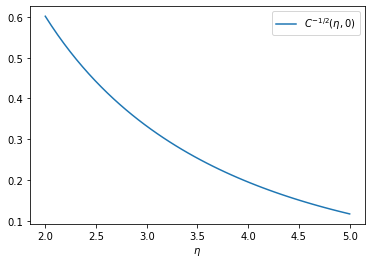

In [30]:
import numpy as np
import matplotlib.pyplot as plt

yn = np.linspace(2, 5)
plt.plot(yn, 1/np.sqrt(np.cosh(yn) - 1), label=r"$C^{-1/2}(\eta, 0)$")
plt.legend()
plt.xlabel(r"$\eta$");

## Simulation study

We confirm the analytical results in a toy simulation. We first generate some toy data. The $p_T$ distribution is exponential. The distribution in $\eta$ and $\phi$ are uniform. We then form all unique pairs and compute the invariant mass for the case with candidate masses assumed to be zero.

In [31]:
import numpy as np

rng = np.random.default_rng(1)

pt = rng.exponential(size=1000)
eta = rng.uniform(2, 5, size=1000)
phi = rng.uniform(-np.pi, np.pi, size=1000)

f = lambdify((pt1, eta1, phi1, pt2, eta2, phi2), m_approx_expr, "math")

# this is slow in pure Python, but we don't care for a one-shot
m = []
for i in range(1000):
    for j in range(i):
        m.append(f(pt[i], eta[i], phi[i], pt[j], eta[j], phi[j]))
m = np.array(m)

We make a histogram of the resulting distribution.

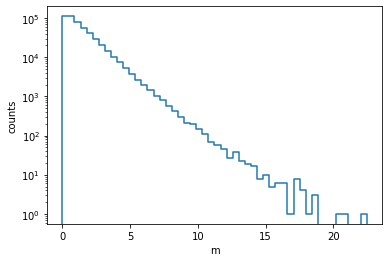

In [32]:
n, xe = np.histogram(m, bins=50)

from pyik.mplext import plot_hist

plot_hist(xe, n)
plt.xlabel("m")
plt.ylabel("counts")
plt.semilogy();

It looks approximately like an exponential, but there are differences. The peak at zero is cut off and the slope varies, being steeper near zero and flatter in the tail. In a narrow interval, however, the exponential distribution is expected to give a good description.

We fit a simple exponential model and a more complex model that takes our analytical solution in account. It is a superposition of three distributions of the form $A_i \sqrt{m} e^{-B_i m}$ with approximate the integral that we cannot compute analytically.

In [33]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

def model_A(x, a, b):
    return a * np.exp(- x * b)

def model_B(x, par):
    npar = len(par) // 2
    par = np.asarray(par)[:, None]
    return x ** 0.5 * np.sum(par[:npar] * np.exp(-x * par[npar:]), axis=0)

cx = (xe[1:] + xe[:-1]) / 2
nerr = (n + 0.5) ** 0.5

In [34]:
min1 = Minuit(LeastSquares(cx, n, nerr, model_A), 1, 1)
min1.limits = (0, None)
min1.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 7712                       │              Nfcn = 177              │
│ EDM = 4.59e-07 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 153.21e3  │  0.30e3   │            │            │    0    │         │       │
│ 1 │ b    │ 691.0e-3  │  0.9e-3   │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 8.84e+04    0.182 │
│ b │    0.182 8.14e-07 │
└───┴───────────────────┘

In [35]:
min2 = Minuit(LeastSquares(cx, n, nerr, model_B), np.ones(6))
min2.limits = (0, None)
min2.migrad(ncall=10000)

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 149                        │             Nfcn = 1583              │
│ EDM = 8.62e-06 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   3.2e3   │   1.5e3   │            │            │    0    │         │       │
│ 1 │ x1   │   197e3   │    6e3    │            │            │    0    │         │       │
│ 2 │ x2   │   123e3   │    5e3    │            │            │    0    │         │       │
│ 3 │ x3   │   0.500   │   0.033   │            │            │    0    │         │       │
│ 4 │ x4   │   1.744   │   0.033   │            │            │    0    │         │       │
│ 5 │ x5   │   0.864   │   0.017   │            │            │    0    │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4        x5 │
├────┼─────────────────────────────────────────────────────────────┤
│ x0 │  2.35e+06  -6.8e+06  4.87e+06      49.3      29.4      23.5 │
│ x1 │  -6.8e+06  3.32e+07 -2.85e+07      -128      -163     -93.8 │
│ x2 │  4.87e+06 -2.85e+07  2.74e+07      86.3       165      78.7 │
│ x3 │      49.3      -128      86.3   0.00107  0.000538   0.00046 │
│ x4 │      29.4      -163       165  0.000538   0.00108  0.000464 │
│ x5 │      23.5     -93.8      78.7   0.00046  0.000464   0.00029 │
└────┴─────────────────────────────────────────────────────────────┘

Text(0.5, 0, 'm')

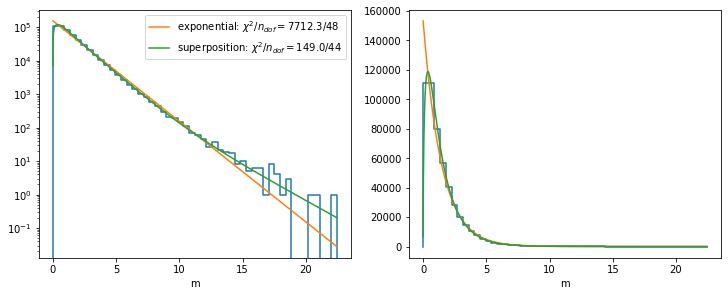

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
plt.sca(ax[0])
plot_hist(xe, n)
xm = np.linspace(xe[0], xe[-1], 1000)
plt.plot(xm, model_A(xm, *min1.values), label=f"exponential: $\\chi^2/n_{{dof}} = {min1.fval:.1f}/{len(cx) - min1.nfit}$")
plt.plot(xm, model_B(xm, min2.values), label=f"superposition: $\\chi^2/n_{{dof}} = {min2.fval:.1f}/{len(cx) - min2.nfit}$")
plt.semilogy()
plt.legend()
plt.xlabel("m")
plt.sca(ax[1])
plot_hist(xe, n)
plt.plot(xm, model_A(xm, *min1.values))
plt.plot(xm, model_B(xm, min2.values))
plt.xlabel("m")

The sophisticated superposition model globally describes the distribution much better than the plain exponential model. The cut-off near zero is modeled by the term $\sqrt{m}$, which suppresses the rise of the pure exponentials near zero. The superposition of three exponentials with different slopes is able to match the changing slope.

Even for the sophisticated model, $\chi^2$ does not look so good, but that is because  we use the approximate least-squares method here to keep it simple, in which we do not integrate the model over each bin. The implied approximation is bad near $m = 0$, where the distribution has a sharp peak.

For an approximation over a local interval not too close to $m = 0$, a simple exponential distribution will also perform well, since locally one of the exponentail distributions is dominant.